In [1]:
from label_names import *
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image,ImageFilter

path = os.getcwd()
if path.split('/')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from src.engine import Engine
from src.core.criterions import *
from src.utils.util import *
from src.core.datasets import *
from torch.utils.data import DataLoader
%matplotlib inline

# Load a model

In [3]:
config_path = 'configs/mln_resnet18_imagenet.yml'
save_dir = '/data/private/Uncertainty-CAM/notebook_test'
imagenet_pwd = "/data/opensets/imagenet-pytorch/train"
parts_path = "/data/private/Uncertainty-CAM/data/Annotations_Part"
checkpoint_path = '/data/private/Uncertainty-CAM/ckpt_imagenet_noise/checkpoint_best.pth'
VOC2010_IMAGEPATH = "/data/private/Uncertainty-CAM/data/VOCdevkit/VOC2010/JPEGImages"

logger = load_log(save_dir)

In [4]:
engine = Engine(config_path, logger, save_dir,device='cuda')
engine.model_config['checkpoint_path'] = checkpoint_path
engine.define()


[2022-01-26 22:46:30,230 - /data/private/Uncertainty-CAM/notebook_test] GPU is available.
[2022-01-26 22:46:30,234 - /data/private/Uncertainty-CAM/notebook_test] Build a dataloader
[2022-01-26 22:48:07,485 - /data/private/Uncertainty-CAM/notebook_test] Build a model
[2022-01-26 22:48:11,924 - /data/private/Uncertainty-CAM/notebook_test] Build a Optimizer, Scheduler etc...
[2022-01-26 22:48:11,927 - /data/private/Uncertainty-CAM/notebook_test] SGD opimizer is built.
[2022-01-26 22:48:11,928 - /data/private/Uncertainty-CAM/notebook_test] CUSTOM scheduler is built.
[2022-01-26 22:48:11,933 - /data/private/Uncertainty-CAM/notebook_test] Criterion is built.
[2022-01-26 22:48:11,933 - /data/private/Uncertainty-CAM/notebook_test] Loss meter is built.
[2022-01-26 22:48:11,934 - /data/private/Uncertainty-CAM/notebook_test] Checkpointer is built.
[2022-01-26 22:48:11,936 - /data/private/Uncertainty-CAM/notebook_test] Loading checkpoint from /data/private/Uncertainty-CAM/ckpt_imagenet_noise/check

RuntimeError: Error(s) in loading state_dict for MixtureLogitNetwork:
	Missing key(s) in state_dict: "backbone.conv1.weight", "backbone.bn1.weight", "backbone.bn1.bias", "backbone.bn1.running_mean", "backbone.bn1.running_var", "backbone.layer1.0.conv1.weight", "backbone.layer1.0.bn1.weight", "backbone.layer1.0.bn1.bias", "backbone.layer1.0.bn1.running_mean", "backbone.layer1.0.bn1.running_var", "backbone.layer1.0.conv2.weight", "backbone.layer1.0.bn2.weight", "backbone.layer1.0.bn2.bias", "backbone.layer1.0.bn2.running_mean", "backbone.layer1.0.bn2.running_var", "backbone.layer1.0.conv3.weight", "backbone.layer1.0.bn3.weight", "backbone.layer1.0.bn3.bias", "backbone.layer1.0.bn3.running_mean", "backbone.layer1.0.bn3.running_var", "backbone.layer1.0.downsample.0.weight", "backbone.layer1.0.downsample.1.weight", "backbone.layer1.0.downsample.1.bias", "backbone.layer1.0.downsample.1.running_mean", "backbone.layer1.0.downsample.1.running_var", "backbone.layer1.1.conv1.weight", "backbone.layer1.1.bn1.weight", "backbone.layer1.1.bn1.bias", "backbone.layer1.1.bn1.running_mean", "backbone.layer1.1.bn1.running_var", "backbone.layer1.1.conv2.weight", "backbone.layer1.1.bn2.weight", "backbone.layer1.1.bn2.bias", "backbone.layer1.1.bn2.running_mean", "backbone.layer1.1.bn2.running_var", "backbone.layer1.1.conv3.weight", "backbone.layer1.1.bn3.weight", "backbone.layer1.1.bn3.bias", "backbone.layer1.1.bn3.running_mean", "backbone.layer1.1.bn3.running_var", "backbone.layer1.2.conv1.weight", "backbone.layer1.2.bn1.weight", "backbone.layer1.2.bn1.bias", "backbone.layer1.2.bn1.running_mean", "backbone.layer1.2.bn1.running_var", "backbone.layer1.2.conv2.weight", "backbone.layer1.2.bn2.weight", "backbone.layer1.2.bn2.bias", "backbone.layer1.2.bn2.running_mean", "backbone.layer1.2.bn2.running_var", "backbone.layer1.2.conv3.weight", "backbone.layer1.2.bn3.weight", "backbone.layer1.2.bn3.bias", "backbone.layer1.2.bn3.running_mean", "backbone.layer1.2.bn3.running_var", "backbone.layer2.0.conv1.weight", "backbone.layer2.0.bn1.weight", "backbone.layer2.0.bn1.bias", "backbone.layer2.0.bn1.running_mean", "backbone.layer2.0.bn1.running_var", "backbone.layer2.0.conv2.weight", "backbone.layer2.0.bn2.weight", "backbone.layer2.0.bn2.bias", "backbone.layer2.0.bn2.running_mean", "backbone.layer2.0.bn2.running_var", "backbone.layer2.0.conv3.weight", "backbone.layer2.0.bn3.weight", "backbone.layer2.0.bn3.bias", "backbone.layer2.0.bn3.running_mean", "backbone.layer2.0.bn3.running_var", "backbone.layer2.0.downsample.0.weight", "backbone.layer2.0.downsample.1.weight", "backbone.layer2.0.downsample.1.bias", "backbone.layer2.0.downsample.1.running_mean", "backbone.layer2.0.downsample.1.running_var", "backbone.layer2.1.conv1.weight", "backbone.layer2.1.bn1.weight", "backbone.layer2.1.bn1.bias", "backbone.layer2.1.bn1.running_mean", "backbone.layer2.1.bn1.running_var", "backbone.layer2.1.conv2.weight", "backbone.layer2.1.bn2.weight", "backbone.layer2.1.bn2.bias", "backbone.layer2.1.bn2.running_mean", "backbone.layer2.1.bn2.running_var", "backbone.layer2.1.conv3.weight", "backbone.layer2.1.bn3.weight", "backbone.layer2.1.bn3.bias", "backbone.layer2.1.bn3.running_mean", "backbone.layer2.1.bn3.running_var", "backbone.layer2.2.conv1.weight", "backbone.layer2.2.bn1.weight", "backbone.layer2.2.bn1.bias", "backbone.layer2.2.bn1.running_mean", "backbone.layer2.2.bn1.running_var", "backbone.layer2.2.conv2.weight", "backbone.layer2.2.bn2.weight", "backbone.layer2.2.bn2.bias", "backbone.layer2.2.bn2.running_mean", "backbone.layer2.2.bn2.running_var", "backbone.layer2.2.conv3.weight", "backbone.layer2.2.bn3.weight", "backbone.layer2.2.bn3.bias", "backbone.layer2.2.bn3.running_mean", "backbone.layer2.2.bn3.running_var", "backbone.layer2.3.conv1.weight", "backbone.layer2.3.bn1.weight", "backbone.layer2.3.bn1.bias", "backbone.layer2.3.bn1.running_mean", "backbone.layer2.3.bn1.running_var", "backbone.layer2.3.conv2.weight", "backbone.layer2.3.bn2.weight", "backbone.layer2.3.bn2.bias", "backbone.layer2.3.bn2.running_mean", "backbone.layer2.3.bn2.running_var", "backbone.layer2.3.conv3.weight", "backbone.layer2.3.bn3.weight", "backbone.layer2.3.bn3.bias", "backbone.layer2.3.bn3.running_mean", "backbone.layer2.3.bn3.running_var", "backbone.layer3.0.conv1.weight", "backbone.layer3.0.bn1.weight", "backbone.layer3.0.bn1.bias", "backbone.layer3.0.bn1.running_mean", "backbone.layer3.0.bn1.running_var", "backbone.layer3.0.conv2.weight", "backbone.layer3.0.bn2.weight", "backbone.layer3.0.bn2.bias", "backbone.layer3.0.bn2.running_mean", "backbone.layer3.0.bn2.running_var", "backbone.layer3.0.conv3.weight", "backbone.layer3.0.bn3.weight", "backbone.layer3.0.bn3.bias", "backbone.layer3.0.bn3.running_mean", "backbone.layer3.0.bn3.running_var", "backbone.layer3.0.downsample.0.weight", "backbone.layer3.0.downsample.1.weight", "backbone.layer3.0.downsample.1.bias", "backbone.layer3.0.downsample.1.running_mean", "backbone.layer3.0.downsample.1.running_var", "backbone.layer3.1.conv1.weight", "backbone.layer3.1.bn1.weight", "backbone.layer3.1.bn1.bias", "backbone.layer3.1.bn1.running_mean", "backbone.layer3.1.bn1.running_var", "backbone.layer3.1.conv2.weight", "backbone.layer3.1.bn2.weight", "backbone.layer3.1.bn2.bias", "backbone.layer3.1.bn2.running_mean", "backbone.layer3.1.bn2.running_var", "backbone.layer3.1.conv3.weight", "backbone.layer3.1.bn3.weight", "backbone.layer3.1.bn3.bias", "backbone.layer3.1.bn3.running_mean", "backbone.layer3.1.bn3.running_var", "backbone.layer3.2.conv1.weight", "backbone.layer3.2.bn1.weight", "backbone.layer3.2.bn1.bias", "backbone.layer3.2.bn1.running_mean", "backbone.layer3.2.bn1.running_var", "backbone.layer3.2.conv2.weight", "backbone.layer3.2.bn2.weight", "backbone.layer3.2.bn2.bias", "backbone.layer3.2.bn2.running_mean", "backbone.layer3.2.bn2.running_var", "backbone.layer3.2.conv3.weight", "backbone.layer3.2.bn3.weight", "backbone.layer3.2.bn3.bias", "backbone.layer3.2.bn3.running_mean", "backbone.layer3.2.bn3.running_var", "backbone.layer3.3.conv1.weight", "backbone.layer3.3.bn1.weight", "backbone.layer3.3.bn1.bias", "backbone.layer3.3.bn1.running_mean", "backbone.layer3.3.bn1.running_var", "backbone.layer3.3.conv2.weight", "backbone.layer3.3.bn2.weight", "backbone.layer3.3.bn2.bias", "backbone.layer3.3.bn2.running_mean", "backbone.layer3.3.bn2.running_var", "backbone.layer3.3.conv3.weight", "backbone.layer3.3.bn3.weight", "backbone.layer3.3.bn3.bias", "backbone.layer3.3.bn3.running_mean", "backbone.layer3.3.bn3.running_var", "backbone.layer3.4.conv1.weight", "backbone.layer3.4.bn1.weight", "backbone.layer3.4.bn1.bias", "backbone.layer3.4.bn1.running_mean", "backbone.layer3.4.bn1.running_var", "backbone.layer3.4.conv2.weight", "backbone.layer3.4.bn2.weight", "backbone.layer3.4.bn2.bias", "backbone.layer3.4.bn2.running_mean", "backbone.layer3.4.bn2.running_var", "backbone.layer3.4.conv3.weight", "backbone.layer3.4.bn3.weight", "backbone.layer3.4.bn3.bias", "backbone.layer3.4.bn3.running_mean", "backbone.layer3.4.bn3.running_var", "backbone.layer3.5.conv1.weight", "backbone.layer3.5.bn1.weight", "backbone.layer3.5.bn1.bias", "backbone.layer3.5.bn1.running_mean", "backbone.layer3.5.bn1.running_var", "backbone.layer3.5.conv2.weight", "backbone.layer3.5.bn2.weight", "backbone.layer3.5.bn2.bias", "backbone.layer3.5.bn2.running_mean", "backbone.layer3.5.bn2.running_var", "backbone.layer3.5.conv3.weight", "backbone.layer3.5.bn3.weight", "backbone.layer3.5.bn3.bias", "backbone.layer3.5.bn3.running_mean", "backbone.layer3.5.bn3.running_var", "backbone.layer4.0.conv1.weight", "backbone.layer4.0.bn1.weight", "backbone.layer4.0.bn1.bias", "backbone.layer4.0.bn1.running_mean", "backbone.layer4.0.bn1.running_var", "backbone.layer4.0.conv2.weight", "backbone.layer4.0.bn2.weight", "backbone.layer4.0.bn2.bias", "backbone.layer4.0.bn2.running_mean", "backbone.layer4.0.bn2.running_var", "backbone.layer4.0.conv3.weight", "backbone.layer4.0.bn3.weight", "backbone.layer4.0.bn3.bias", "backbone.layer4.0.bn3.running_mean", "backbone.layer4.0.bn3.running_var", "backbone.layer4.0.downsample.0.weight", "backbone.layer4.0.downsample.1.weight", "backbone.layer4.0.downsample.1.bias", "backbone.layer4.0.downsample.1.running_mean", "backbone.layer4.0.downsample.1.running_var", "backbone.layer4.1.conv1.weight", "backbone.layer4.1.bn1.weight", "backbone.layer4.1.bn1.bias", "backbone.layer4.1.bn1.running_mean", "backbone.layer4.1.bn1.running_var", "backbone.layer4.1.conv2.weight", "backbone.layer4.1.bn2.weight", "backbone.layer4.1.bn2.bias", "backbone.layer4.1.bn2.running_mean", "backbone.layer4.1.bn2.running_var", "backbone.layer4.1.conv3.weight", "backbone.layer4.1.bn3.weight", "backbone.layer4.1.bn3.bias", "backbone.layer4.1.bn3.running_mean", "backbone.layer4.1.bn3.running_var", "backbone.layer4.2.conv1.weight", "backbone.layer4.2.bn1.weight", "backbone.layer4.2.bn1.bias", "backbone.layer4.2.bn1.running_mean", "backbone.layer4.2.bn1.running_var", "backbone.layer4.2.conv2.weight", "backbone.layer4.2.bn2.weight", "backbone.layer4.2.bn2.bias", "backbone.layer4.2.bn2.running_mean", "backbone.layer4.2.bn2.running_var", "backbone.layer4.2.conv3.weight", "backbone.layer4.2.bn3.weight", "backbone.layer4.2.bn3.bias", "backbone.layer4.2.bn3.running_mean", "backbone.layer4.2.bn3.running_var", "mol.fc_pi.weight", "mol.fc_pi.bias", "mol.fc_mu.weight", "mol.fc_mu.bias", "mol.fc_sigma.weight", "mol.fc_sigma.bias". 
	Unexpected key(s) in state_dict: "module.backbone.conv1.weight", "module.backbone.bn1.weight", "module.backbone.bn1.bias", "module.backbone.bn1.running_mean", "module.backbone.bn1.running_var", "module.backbone.bn1.num_batches_tracked", "module.backbone.layer1.0.conv1.weight", "module.backbone.layer1.0.bn1.weight", "module.backbone.layer1.0.bn1.bias", "module.backbone.layer1.0.bn1.running_mean", "module.backbone.layer1.0.bn1.running_var", "module.backbone.layer1.0.bn1.num_batches_tracked", "module.backbone.layer1.0.conv2.weight", "module.backbone.layer1.0.bn2.weight", "module.backbone.layer1.0.bn2.bias", "module.backbone.layer1.0.bn2.running_mean", "module.backbone.layer1.0.bn2.running_var", "module.backbone.layer1.0.bn2.num_batches_tracked", "module.backbone.layer1.0.conv3.weight", "module.backbone.layer1.0.bn3.weight", "module.backbone.layer1.0.bn3.bias", "module.backbone.layer1.0.bn3.running_mean", "module.backbone.layer1.0.bn3.running_var", "module.backbone.layer1.0.bn3.num_batches_tracked", "module.backbone.layer1.0.downsample.0.weight", "module.backbone.layer1.0.downsample.1.weight", "module.backbone.layer1.0.downsample.1.bias", "module.backbone.layer1.0.downsample.1.running_mean", "module.backbone.layer1.0.downsample.1.running_var", "module.backbone.layer1.0.downsample.1.num_batches_tracked", "module.backbone.layer1.1.conv1.weight", "module.backbone.layer1.1.bn1.weight", "module.backbone.layer1.1.bn1.bias", "module.backbone.layer1.1.bn1.running_mean", "module.backbone.layer1.1.bn1.running_var", "module.backbone.layer1.1.bn1.num_batches_tracked", "module.backbone.layer1.1.conv2.weight", "module.backbone.layer1.1.bn2.weight", "module.backbone.layer1.1.bn2.bias", "module.backbone.layer1.1.bn2.running_mean", "module.backbone.layer1.1.bn2.running_var", "module.backbone.layer1.1.bn2.num_batches_tracked", "module.backbone.layer1.1.conv3.weight", "module.backbone.layer1.1.bn3.weight", "module.backbone.layer1.1.bn3.bias", "module.backbone.layer1.1.bn3.running_mean", "module.backbone.layer1.1.bn3.running_var", "module.backbone.layer1.1.bn3.num_batches_tracked", "module.backbone.layer1.2.conv1.weight", "module.backbone.layer1.2.bn1.weight", "module.backbone.layer1.2.bn1.bias", "module.backbone.layer1.2.bn1.running_mean", "module.backbone.layer1.2.bn1.running_var", "module.backbone.layer1.2.bn1.num_batches_tracked", "module.backbone.layer1.2.conv2.weight", "module.backbone.layer1.2.bn2.weight", "module.backbone.layer1.2.bn2.bias", "module.backbone.layer1.2.bn2.running_mean", "module.backbone.layer1.2.bn2.running_var", "module.backbone.layer1.2.bn2.num_batches_tracked", "module.backbone.layer1.2.conv3.weight", "module.backbone.layer1.2.bn3.weight", "module.backbone.layer1.2.bn3.bias", "module.backbone.layer1.2.bn3.running_mean", "module.backbone.layer1.2.bn3.running_var", "module.backbone.layer1.2.bn3.num_batches_tracked", "module.backbone.layer2.0.conv1.weight", "module.backbone.layer2.0.bn1.weight", "module.backbone.layer2.0.bn1.bias", "module.backbone.layer2.0.bn1.running_mean", "module.backbone.layer2.0.bn1.running_var", "module.backbone.layer2.0.bn1.num_batches_tracked", "module.backbone.layer2.0.conv2.weight", "module.backbone.layer2.0.bn2.weight", "module.backbone.layer2.0.bn2.bias", "module.backbone.layer2.0.bn2.running_mean", "module.backbone.layer2.0.bn2.running_var", "module.backbone.layer2.0.bn2.num_batches_tracked", "module.backbone.layer2.0.conv3.weight", "module.backbone.layer2.0.bn3.weight", "module.backbone.layer2.0.bn3.bias", "module.backbone.layer2.0.bn3.running_mean", "module.backbone.layer2.0.bn3.running_var", "module.backbone.layer2.0.bn3.num_batches_tracked", "module.backbone.layer2.0.downsample.0.weight", "module.backbone.layer2.0.downsample.1.weight", "module.backbone.layer2.0.downsample.1.bias", "module.backbone.layer2.0.downsample.1.running_mean", "module.backbone.layer2.0.downsample.1.running_var", "module.backbone.layer2.0.downsample.1.num_batches_tracked", "module.backbone.layer2.1.conv1.weight", "module.backbone.layer2.1.bn1.weight", "module.backbone.layer2.1.bn1.bias", "module.backbone.layer2.1.bn1.running_mean", "module.backbone.layer2.1.bn1.running_var", "module.backbone.layer2.1.bn1.num_batches_tracked", "module.backbone.layer2.1.conv2.weight", "module.backbone.layer2.1.bn2.weight", "module.backbone.layer2.1.bn2.bias", "module.backbone.layer2.1.bn2.running_mean", "module.backbone.layer2.1.bn2.running_var", "module.backbone.layer2.1.bn2.num_batches_tracked", "module.backbone.layer2.1.conv3.weight", "module.backbone.layer2.1.bn3.weight", "module.backbone.layer2.1.bn3.bias", "module.backbone.layer2.1.bn3.running_mean", "module.backbone.layer2.1.bn3.running_var", "module.backbone.layer2.1.bn3.num_batches_tracked", "module.backbone.layer2.2.conv1.weight", "module.backbone.layer2.2.bn1.weight", "module.backbone.layer2.2.bn1.bias", "module.backbone.layer2.2.bn1.running_mean", "module.backbone.layer2.2.bn1.running_var", "module.backbone.layer2.2.bn1.num_batches_tracked", "module.backbone.layer2.2.conv2.weight", "module.backbone.layer2.2.bn2.weight", "module.backbone.layer2.2.bn2.bias", "module.backbone.layer2.2.bn2.running_mean", "module.backbone.layer2.2.bn2.running_var", "module.backbone.layer2.2.bn2.num_batches_tracked", "module.backbone.layer2.2.conv3.weight", "module.backbone.layer2.2.bn3.weight", "module.backbone.layer2.2.bn3.bias", "module.backbone.layer2.2.bn3.running_mean", "module.backbone.layer2.2.bn3.running_var", "module.backbone.layer2.2.bn3.num_batches_tracked", "module.backbone.layer2.3.conv1.weight", "module.backbone.layer2.3.bn1.weight", "module.backbone.layer2.3.bn1.bias", "module.backbone.layer2.3.bn1.running_mean", "module.backbone.layer2.3.bn1.running_var", "module.backbone.layer2.3.bn1.num_batches_tracked", "module.backbone.layer2.3.conv2.weight", "module.backbone.layer2.3.bn2.weight", "module.backbone.layer2.3.bn2.bias", "module.backbone.layer2.3.bn2.running_mean", "module.backbone.layer2.3.bn2.running_var", "module.backbone.layer2.3.bn2.num_batches_tracked", "module.backbone.layer2.3.conv3.weight", "module.backbone.layer2.3.bn3.weight", "module.backbone.layer2.3.bn3.bias", "module.backbone.layer2.3.bn3.running_mean", "module.backbone.layer2.3.bn3.running_var", "module.backbone.layer2.3.bn3.num_batches_tracked", "module.backbone.layer3.0.conv1.weight", "module.backbone.layer3.0.bn1.weight", "module.backbone.layer3.0.bn1.bias", "module.backbone.layer3.0.bn1.running_mean", "module.backbone.layer3.0.bn1.running_var", "module.backbone.layer3.0.bn1.num_batches_tracked", "module.backbone.layer3.0.conv2.weight", "module.backbone.layer3.0.bn2.weight", "module.backbone.layer3.0.bn2.bias", "module.backbone.layer3.0.bn2.running_mean", "module.backbone.layer3.0.bn2.running_var", "module.backbone.layer3.0.bn2.num_batches_tracked", "module.backbone.layer3.0.conv3.weight", "module.backbone.layer3.0.bn3.weight", "module.backbone.layer3.0.bn3.bias", "module.backbone.layer3.0.bn3.running_mean", "module.backbone.layer3.0.bn3.running_var", "module.backbone.layer3.0.bn3.num_batches_tracked", "module.backbone.layer3.0.downsample.0.weight", "module.backbone.layer3.0.downsample.1.weight", "module.backbone.layer3.0.downsample.1.bias", "module.backbone.layer3.0.downsample.1.running_mean", "module.backbone.layer3.0.downsample.1.running_var", "module.backbone.layer3.0.downsample.1.num_batches_tracked", "module.backbone.layer3.1.conv1.weight", "module.backbone.layer3.1.bn1.weight", "module.backbone.layer3.1.bn1.bias", "module.backbone.layer3.1.bn1.running_mean", "module.backbone.layer3.1.bn1.running_var", "module.backbone.layer3.1.bn1.num_batches_tracked", "module.backbone.layer3.1.conv2.weight", "module.backbone.layer3.1.bn2.weight", "module.backbone.layer3.1.bn2.bias", "module.backbone.layer3.1.bn2.running_mean", "module.backbone.layer3.1.bn2.running_var", "module.backbone.layer3.1.bn2.num_batches_tracked", "module.backbone.layer3.1.conv3.weight", "module.backbone.layer3.1.bn3.weight", "module.backbone.layer3.1.bn3.bias", "module.backbone.layer3.1.bn3.running_mean", "module.backbone.layer3.1.bn3.running_var", "module.backbone.layer3.1.bn3.num_batches_tracked", "module.backbone.layer3.2.conv1.weight", "module.backbone.layer3.2.bn1.weight", "module.backbone.layer3.2.bn1.bias", "module.backbone.layer3.2.bn1.running_mean", "module.backbone.layer3.2.bn1.running_var", "module.backbone.layer3.2.bn1.num_batches_tracked", "module.backbone.layer3.2.conv2.weight", "module.backbone.layer3.2.bn2.weight", "module.backbone.layer3.2.bn2.bias", "module.backbone.layer3.2.bn2.running_mean", "module.backbone.layer3.2.bn2.running_var", "module.backbone.layer3.2.bn2.num_batches_tracked", "module.backbone.layer3.2.conv3.weight", "module.backbone.layer3.2.bn3.weight", "module.backbone.layer3.2.bn3.bias", "module.backbone.layer3.2.bn3.running_mean", "module.backbone.layer3.2.bn3.running_var", "module.backbone.layer3.2.bn3.num_batches_tracked", "module.backbone.layer3.3.conv1.weight", "module.backbone.layer3.3.bn1.weight", "module.backbone.layer3.3.bn1.bias", "module.backbone.layer3.3.bn1.running_mean", "module.backbone.layer3.3.bn1.running_var", "module.backbone.layer3.3.bn1.num_batches_tracked", "module.backbone.layer3.3.conv2.weight", "module.backbone.layer3.3.bn2.weight", "module.backbone.layer3.3.bn2.bias", "module.backbone.layer3.3.bn2.running_mean", "module.backbone.layer3.3.bn2.running_var", "module.backbone.layer3.3.bn2.num_batches_tracked", "module.backbone.layer3.3.conv3.weight", "module.backbone.layer3.3.bn3.weight", "module.backbone.layer3.3.bn3.bias", "module.backbone.layer3.3.bn3.running_mean", "module.backbone.layer3.3.bn3.running_var", "module.backbone.layer3.3.bn3.num_batches_tracked", "module.backbone.layer3.4.conv1.weight", "module.backbone.layer3.4.bn1.weight", "module.backbone.layer3.4.bn1.bias", "module.backbone.layer3.4.bn1.running_mean", "module.backbone.layer3.4.bn1.running_var", "module.backbone.layer3.4.bn1.num_batches_tracked", "module.backbone.layer3.4.conv2.weight", "module.backbone.layer3.4.bn2.weight", "module.backbone.layer3.4.bn2.bias", "module.backbone.layer3.4.bn2.running_mean", "module.backbone.layer3.4.bn2.running_var", "module.backbone.layer3.4.bn2.num_batches_tracked", "module.backbone.layer3.4.conv3.weight", "module.backbone.layer3.4.bn3.weight", "module.backbone.layer3.4.bn3.bias", "module.backbone.layer3.4.bn3.running_mean", "module.backbone.layer3.4.bn3.running_var", "module.backbone.layer3.4.bn3.num_batches_tracked", "module.backbone.layer3.5.conv1.weight", "module.backbone.layer3.5.bn1.weight", "module.backbone.layer3.5.bn1.bias", "module.backbone.layer3.5.bn1.running_mean", "module.backbone.layer3.5.bn1.running_var", "module.backbone.layer3.5.bn1.num_batches_tracked", "module.backbone.layer3.5.conv2.weight", "module.backbone.layer3.5.bn2.weight", "module.backbone.layer3.5.bn2.bias", "module.backbone.layer3.5.bn2.running_mean", "module.backbone.layer3.5.bn2.running_var", "module.backbone.layer3.5.bn2.num_batches_tracked", "module.backbone.layer3.5.conv3.weight", "module.backbone.layer3.5.bn3.weight", "module.backbone.layer3.5.bn3.bias", "module.backbone.layer3.5.bn3.running_mean", "module.backbone.layer3.5.bn3.running_var", "module.backbone.layer3.5.bn3.num_batches_tracked", "module.backbone.layer4.0.conv1.weight", "module.backbone.layer4.0.bn1.weight", "module.backbone.layer4.0.bn1.bias", "module.backbone.layer4.0.bn1.running_mean", "module.backbone.layer4.0.bn1.running_var", "module.backbone.layer4.0.bn1.num_batches_tracked", "module.backbone.layer4.0.conv2.weight", "module.backbone.layer4.0.bn2.weight", "module.backbone.layer4.0.bn2.bias", "module.backbone.layer4.0.bn2.running_mean", "module.backbone.layer4.0.bn2.running_var", "module.backbone.layer4.0.bn2.num_batches_tracked", "module.backbone.layer4.0.conv3.weight", "module.backbone.layer4.0.bn3.weight", "module.backbone.layer4.0.bn3.bias", "module.backbone.layer4.0.bn3.running_mean", "module.backbone.layer4.0.bn3.running_var", "module.backbone.layer4.0.bn3.num_batches_tracked", "module.backbone.layer4.0.downsample.0.weight", "module.backbone.layer4.0.downsample.1.weight", "module.backbone.layer4.0.downsample.1.bias", "module.backbone.layer4.0.downsample.1.running_mean", "module.backbone.layer4.0.downsample.1.running_var", "module.backbone.layer4.0.downsample.1.num_batches_tracked", "module.backbone.layer4.1.conv1.weight", "module.backbone.layer4.1.bn1.weight", "module.backbone.layer4.1.bn1.bias", "module.backbone.layer4.1.bn1.running_mean", "module.backbone.layer4.1.bn1.running_var", "module.backbone.layer4.1.bn1.num_batches_tracked", "module.backbone.layer4.1.conv2.weight", "module.backbone.layer4.1.bn2.weight", "module.backbone.layer4.1.bn2.bias", "module.backbone.layer4.1.bn2.running_mean", "module.backbone.layer4.1.bn2.running_var", "module.backbone.layer4.1.bn2.num_batches_tracked", "module.backbone.layer4.1.conv3.weight", "module.backbone.layer4.1.bn3.weight", "module.backbone.layer4.1.bn3.bias", "module.backbone.layer4.1.bn3.running_mean", "module.backbone.layer4.1.bn3.running_var", "module.backbone.layer4.1.bn3.num_batches_tracked", "module.backbone.layer4.2.conv1.weight", "module.backbone.layer4.2.bn1.weight", "module.backbone.layer4.2.bn1.bias", "module.backbone.layer4.2.bn1.running_mean", "module.backbone.layer4.2.bn1.running_var", "module.backbone.layer4.2.bn1.num_batches_tracked", "module.backbone.layer4.2.conv2.weight", "module.backbone.layer4.2.bn2.weight", "module.backbone.layer4.2.bn2.bias", "module.backbone.layer4.2.bn2.running_mean", "module.backbone.layer4.2.bn2.running_var", "module.backbone.layer4.2.bn2.num_batches_tracked", "module.backbone.layer4.2.conv3.weight", "module.backbone.layer4.2.bn3.weight", "module.backbone.layer4.2.bn3.bias", "module.backbone.layer4.2.bn3.running_mean", "module.backbone.layer4.2.bn3.running_var", "module.backbone.layer4.2.bn3.num_batches_tracked", "module.mol.fc_pi.weight", "module.mol.fc_pi.bias", "module.mol.fc_mu.weight", "module.mol.fc_mu.bias", "module.mol.fc_sigma.weight", "module.mol.fc_sigma.bias". 

## Noise Images

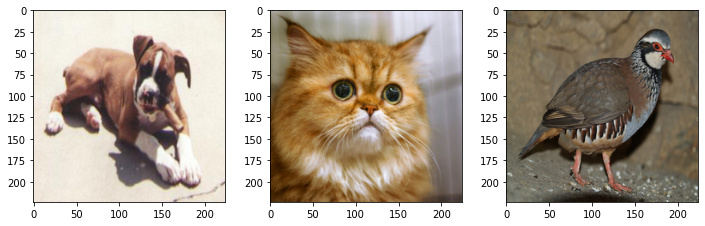

In [5]:
dog_img = Image.open(imagenet_pwd+"/n02108089/n02108089_315.JPEG")
dog_img = dog_img.resize((224, 224), Image.ANTIALIAS)

cat_img = Image.open(imagenet_pwd+"/n02123394/n02123394_274.JPEG")
cat_img = cat_img.resize((224, 224), Image.ANTIALIAS)

bird_img = Image.open(imagenet_pwd+"/n01797886/n01797886_35.JPEG")
bird_img = bird_img.resize((224, 224), Image.ANTIALIAS)

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.imshow(dog_img)
plt.subplot(3,3,2)
plt.imshow(cat_img)
plt.subplot(3,3,3)
plt.imshow(bird_img)

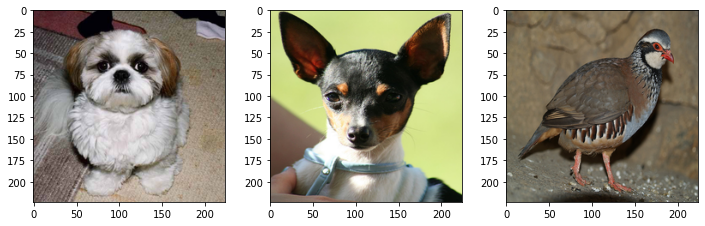

In [6]:
dog_img2 = Image.open(imagenet_pwd+"/n02086240/n02086240_146.JPEG")
dog_img2 = dog_img2.resize((224, 224), Image.ANTIALIAS)

dog_img3 = Image.open(imagenet_pwd+"/n02087046/n02087046_436.JPEG")
dog_img3 = dog_img3.resize((224, 224), Image.ANTIALIAS)

bird_img = Image.open(imagenet_pwd+"/n01797886/n01797886_35.JPEG")
bird_img = bird_img.resize((224, 224), Image.ANTIALIAS)

plt.figure(figsize=(12,12)) 
plt.subplot(3,3,1)
plt.imshow(dog_img2)
plt.subplot(3,3,2)
plt.imshow(dog_img3)
plt.subplot(3,3,3)
plt.imshow(bird_img)

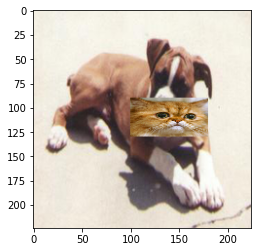

In [7]:
#img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,130,180],[20,20,180,180])
#img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,90,180],[20,20,180,180])
img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [90,100,130,180],[20,20,180,180])
#img_cutout = cutout_func(np.array(cat_img), np.array(dog_img), [50,50,150,150],[30,130,160,160])
plt.imshow(img_cutout)

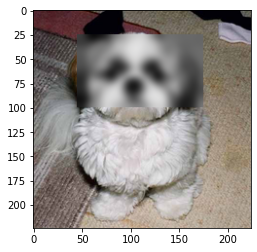

In [8]:
blur_img = blur_func(np.array(dog_img2), [25,45,100,175])
plt.imshow(blur_img)

/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


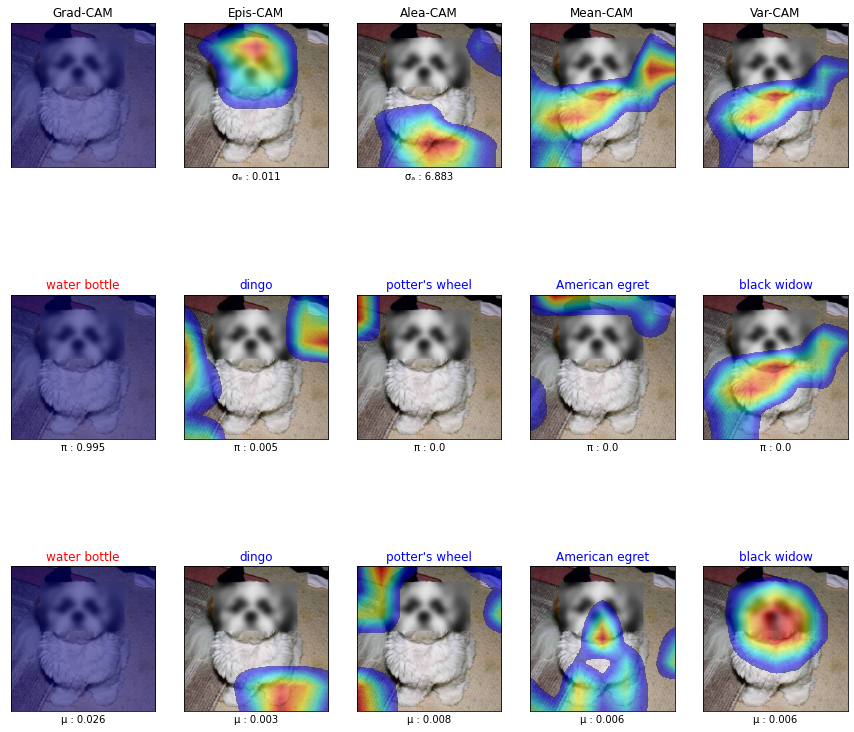

In [9]:
out = plot_func(engine, blur_img)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


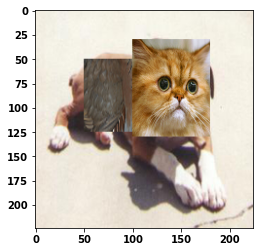

In [10]:
img_cutout2 = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,130,180],[20,20,180,180])
img_cutout2 = cutout_func(np.array(img_cutout2), np.array(bird_img), [50,50,125,100],[75,75,130,160])

plt.imshow(img_cutout2)

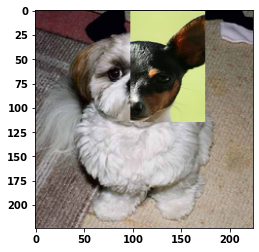

In [11]:
#img_cutout3 = cutout_func(np.array(dog_img), np.array(bird_img), [25,110,125,185],[25,165,80,201])
#img_cutout3 = cutout_func(np.array(dog_img), np.array(bird_img), [80,110,155,185],[25,165,80,201])

img_cutout3 = cutout_func(np.array(dog_img2), np.array(dog_img3), [1,98,115,175],[1,100,165,200])
#img_cutout3 = cutout_func(np.array(dog_img2), np.array(dog_img3), [5,5,60,210],[0,0,80,240])
plt.imshow(img_cutout3)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


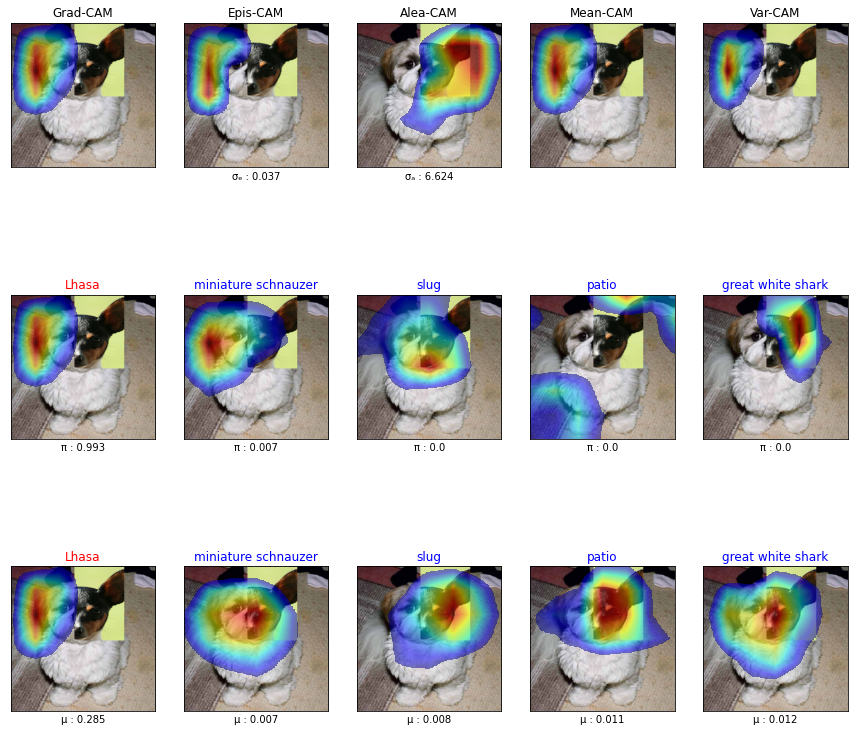

In [12]:
out = plot_func(engine, img_cutout3, save_path = "./dogs_face_cutout.pdf")

## ImageNet CAMs

/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


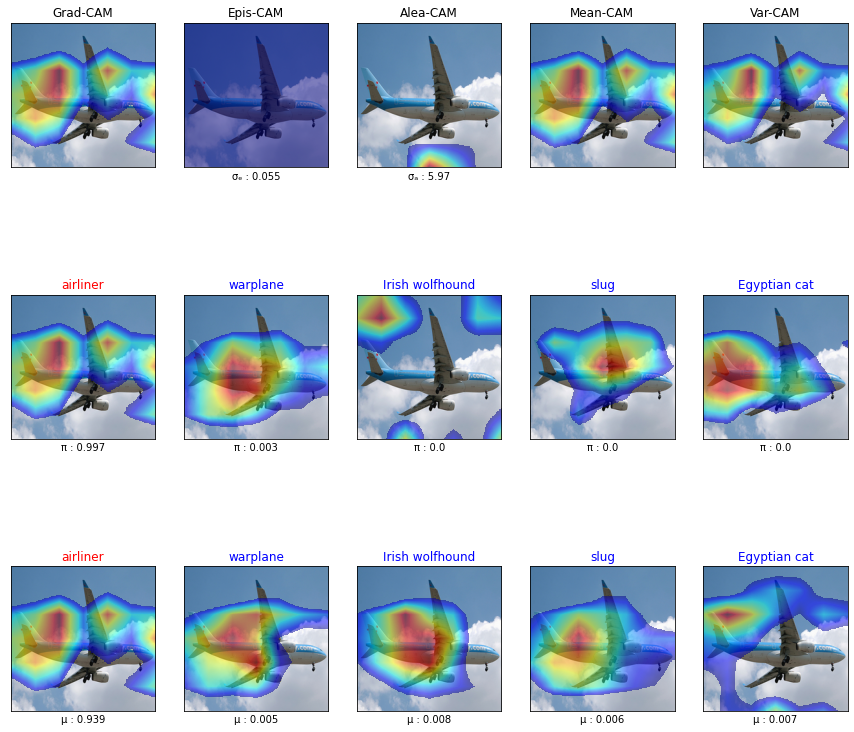

In [13]:
import random

sample_img = imagenet_sample(imagenet_pwd)
out = plot_func(engine, np.array(sample_img))

## which part of image is uncertain? (no noise)

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 background (40866,)
12 dog (2307,)
17 sheep (4371,)


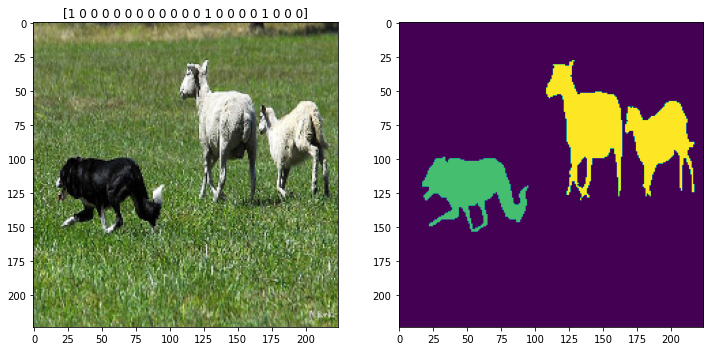

In [5]:
voc_dataset = VOC2012(root = "/data/opensets/voc/VOCdevkit", crop_size=224 ,metadata_split='val',scale=False, flip=False,
                     label_split='SegmentationClass')
voc_loader  = DataLoader(voc_dataset, batch_size=32, shuffle=True)

voc_sample_img, voc_sample_label, voc_sample_mask, _ = voc_dataset[433]
voc_sample_img = (voc_sample_img.transpose(1,2,0)/255.+ voc_dataset.mean_bgr/255.)[:,:,::-1]

for i in list(np.where(voc_sample_label==1)[0]):
    print(i,voc_label_names[i],np.where(voc_sample_mask==i)[0].shape)

plt.figure(figsize=(12,24))
plt.subplot(2,2,1)
plt.title(voc_sample_label)
plt.imshow(voc_sample_img)
plt.subplot(2,2,2)
plt.imshow( np.where(voc_sample_mask==255,0,voc_sample_mask) )

### calculate CAM confusion matrix

where threshold **0.9**

In [6]:
mat33 = calc_mat33(engine, voc_dataset)


/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


2.3323403704183394
Updated
1.7948936170212766
Updated
5.0
4.9788838612368025
4.992502343017807
5.0
5.0
3.9419354838709677
5.0
4.221286031042129
3.6764894298526585
3.884393063583815
3.032496307237814
4.840177580466149
3.9127182044887783
5.0
3.0
5.0
3.967741935483871
2.5786625180770413
3.05
3.006872852233677
2.1748089066134924
Updated
3.5210332103321034
4.332009925558312
4.329769736842105
4.359544256440779
2.1445138269402317
Updated
2.0
Updated
4.344689378757515
3.546938775510204
3.0
4.055882352941176
4.6720098643649814
4.8917378917378915
4.517835178351783
3.0991902834008096
5.0
3.069529652351738
3.020997375328084
1.4637421665174575
Updated
3.699248120300752
3.630071599045346
3.2720930232558136
3.70983446932814
3.951219512195122
3.3333226042664137
3.1199400299850075
4.0
3.3058103975535165
3.0
2.4635879218472465
Updated
3.0
4.028423772609819
4.594202898550725
4.46987951807229
5.0
3.0
3.3490276356192425
3.354037267080745
5.0
4.579617834394905
3.0
3.0868817204301076
3.575757575757576
2.5226

In [7]:
result_list = mat33[-1]
len(result_list)

43

[[1.         0.         1.        ]
 [0.         0.86033229 0.        ]
 [0.         0.13966771 0.        ]]
pillow


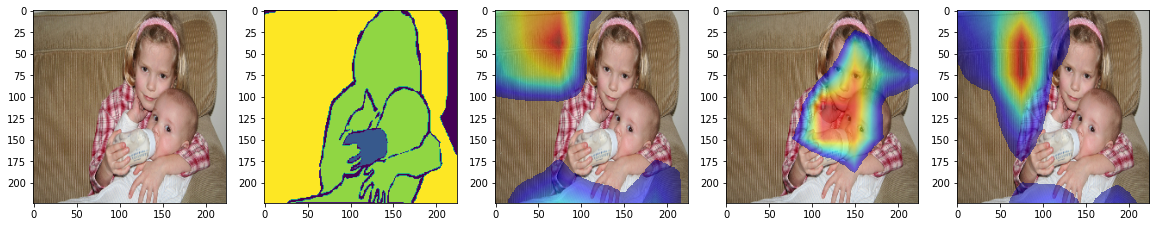

In [78]:
sample = result_list[32]
plt.figure(figsize=(20,25))

print(sample[2])
print(sample[-1])

plt.subplot(1,5,1)
plt.imshow(sample[0])

plt.subplot(1,5,2)
plt.imshow(sample[3])

plt.subplot(1,5,3)
plt.imshow(sample[0])
plt.imshow(np.ma.masked_where(sample[1][0] < 0.1*np.max(sample[1][0]), sample[1][0]), 
           alpha=0.5, cmap='jet')

plt.subplot(1,5,4)
plt.imshow(sample[0])
plt.imshow(np.ma.masked_where(sample[1][1] < 0.5*np.max(sample[1][1]), sample[1][1]), 
           alpha=0.5, cmap='jet')

plt.subplot(1,5,5)
plt.imshow(sample[0])
plt.imshow(np.ma.masked_where(sample[1][2] < 0.1*np.max(sample[1][2]), sample[1][2]), 
           alpha=0.5, cmap='jet')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]]
harmonica


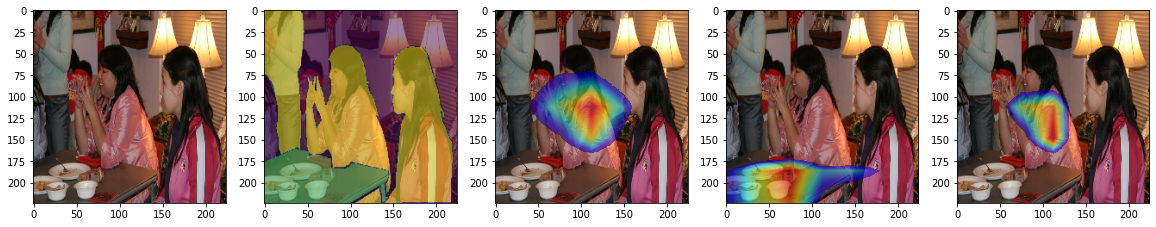

In [179]:
import cv2

sample = result_list[18]
plt.figure(figsize=(20,25))

print(sample[2])
print(sample[-1])

plt.subplot(1,5,1)
plt.imshow(sample[0])

plt.subplot(1,5,2)
#print(sample[3].astype(np.uint8))
#edges = cv2.Canny(sample[3].astype(np.uint8), 0, 200)   # canny edge detector
plt.imshow(sample[0])
plt.imshow(sample[3], alpha=0.5)

plt.subplot(1,5,3)
plt.imshow(sample[0])
plt.imshow(np.ma.masked_where(sample[1][0] < 0.4*np.max(sample[1][0]), sample[1][0]), 
           alpha=0.5, cmap='jet')

plt.subplot(1,5,4)
plt.imshow(sample[0])
plt.imshow(np.ma.masked_where(sample[1][1] < 0.6*np.max(sample[1][1]), sample[1][1]), 
           alpha=0.5, cmap='jet')

plt.subplot(1,5,5)
plt.imshow(sample[0])
plt.imshow(np.ma.masked_where(sample[1][2] < 0.5*np.max(sample[1][2]), sample[1][2]), 
           alpha=0.5, cmap='jet')

In [11]:
mat33 = calc_mat33(engine, voc_dataset)
mat33

2.3323403704183394
Updated
1.7948936170212766
Updated
5.0
4.9788838612368025
4.992502343017807
5.0
5.0
3.9419354838709677
5.0
4.221286031042129
3.6764894298526585
3.884393063583815
3.032496307237814
4.840177580466149
3.9127182044887783
5.0
3.0
5.0
3.967741935483871
2.5786625180770413



KeyboardInterrupt



<AxesSubplot:>

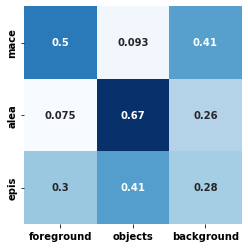

In [17]:
import seaborn as sns

for i in range(3):
    mat33[i,:] /= np.sum(mat33[i,:])

sns.heatmap(mat33, square=True, cbar=False, annot=True, cmap='Blues',\
           xticklabels=['foreground','objects','background'],
           yticklabels=['mace','alea','epis'])

In [34]:
mat33_by_thres = dict()
for th in np.arange(0,1,0.1):
    mat33_tmp = calc_mat33(engine, voc_dataset, th)
    mat33_by_thres[th] = mat33_tmp

/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


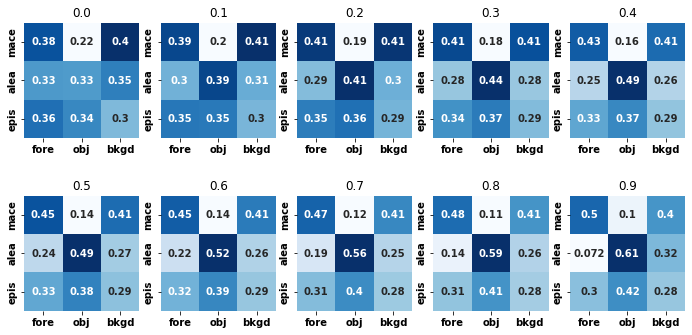

In [35]:
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.5)

for idx,th in enumerate(mat33_by_thres.keys()):
    mat33_tmp = mat33_by_thres[th]
    for i in range(3):
        mat33_tmp[i,:] /= np.sum(mat33_tmp[i,:])
    
    plt.subplot(2,len(list(mat33_by_thres.keys()))//2, idx+1)
    plt.title(round(th,1))
    sns.heatmap(mat33_tmp, square=True, cbar=False, annot=True, cmap='Blues',\
               xticklabels=['fore','obj','bkgd'],
               yticklabels=['mace','alea','epis'])

## Which Part of Image is Unceratin? 
### artificial noise

In [5]:
voc_ids = list() #925
voc_images = list() #925
years = list()
for i in os.listdir(parts_path):
    voc_id = i.split(".")[0]
    voc_image_name = voc_id+".jpg"
    voc_image_full_path = VOC2010_IMAGEPATH + "/"+voc_image_name
    
    pil_image= Image.open(voc_image_full_path)
    voc_ids.append(voc_id)
    voc_images.append(pil_image.resize((224, 224)))

10


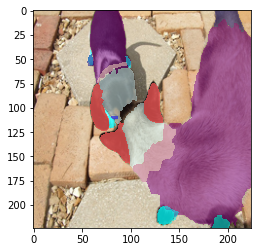

In [6]:
test_idx = 0
voc_parts = io.loadmat(parts_path
                       + "/" + voc_ids[test_idx] + ".mat")
obj_dict = parts_preproc(voc_parts)
print(len(obj_dict[list(obj_dict.keys())[0]]))

part_vis(voc_images[test_idx], obj_dict)


filter out 
+ only one object 
+ annotated all parts

In [7]:
new_ids,new_images,new_parts = filterOut(parts_path, voc_ids, voc_images, only=['cat','dog'])
len(new_ids)

1611

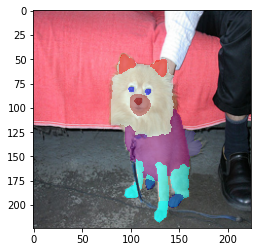

In [8]:
test_idx = 0
part_vis(new_images[test_idx], new_parts[test_idx])

### Gaussian Noise to Head

In [10]:
import matplotlib.patches as patches

test_idx = 4

blur_img = partsBlur(new_images[test_idx], new_parts[test_idx])
cutout_img = partsCutout(new_images[test_idx], new_parts[test_idx], 
                         new_images[test_idx-1], new_parts[test_idx-1])

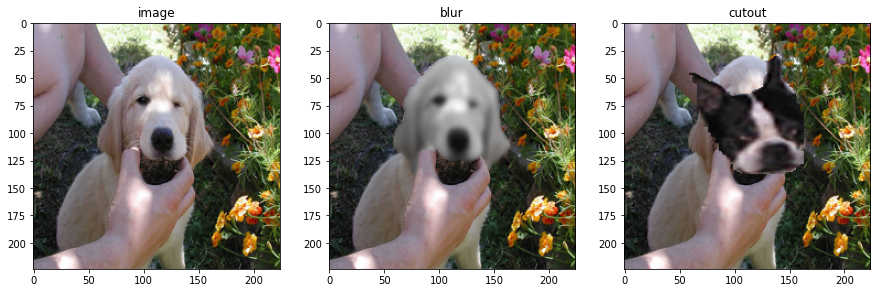

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.title('image')
plt.imshow(new_images[test_idx])
plt.subplot(1,3,2)
plt.title('blur')
plt.imshow(blur_img)
plt.subplot(1,3,3)
plt.title('cutout')
plt.imshow(cutout_img)

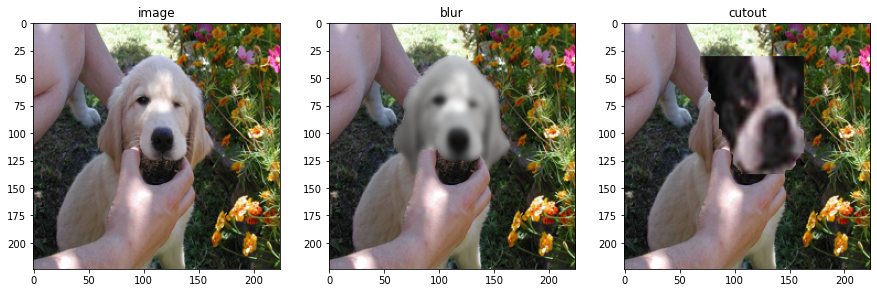

In [18]:
def partsCutout2(img, voc_part, img2, voc_part2, vis=False):
    obj_name = None
    face_mask1 = voc_part[list(voc_part.keys())[0]]['head'] # 224 x 224
    face_mask2 = voc_part2[list(voc_part2.keys())[0]]['head'] # 224 x 224

    cmap = matplotlib.colors.ListedColormap(['none', 'blue'])
    xx,yy= np.where(face_mask1==1)
    xx2,yy2= np.where(face_mask2==1)
    bbox1 = [min(xx),min(yy),max(xx),max(yy)]
    bbox2 = [min(xx2)+(max(xx2)-min(xx2))//2,min(yy2),max(xx2),max(yy2)]
    cutout_img = cutout_func(np.array(img),np.array(img2),bbox1, bbox2)
    

    #print(bbox1)
    swap_region_h,swap_region_w = bbox1[2] - bbox1[0], bbox1[3] - bbox1[1]
    mask_patch = face_mask2[bbox2[0]:bbox2[2],bbox2[1]:bbox2[3]]
    mask_patch = cv2.resize(mask_patch, dsize=(swap_region_w, swap_region_h), interpolation=cv2.INTER_CUBIC)
    mask_map = np.zeros_like(face_mask2)
    mask_map[bbox1[0]:bbox1[2], bbox1[1]:bbox1[3]] = mask_patch

    cutout_img = np.where(np.stack([mask_map==1,mask_map==1,mask_map==1],axis=-1)
                          ,np.array(cutout_img), np.array(img))
    if(vis):
        plt.imshow(np.array(cutout_img))
        #plt.imshow(mask_map, alpha=0.5, cmap=cmap)

    return cutout_img

cutout_img2 = partsCutout2(new_images[test_idx], new_parts[test_idx], 
                         new_images[test_idx-1], new_parts[test_idx-1])

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.title('image')
plt.imshow(new_images[test_idx])
plt.subplot(1,3,2)
plt.title('blur')
plt.imshow(blur_img)
plt.subplot(1,3,3)
plt.title('cutout')
plt.imshow(cutout_img2)

/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


AttributeError: 'Engine' object has no attribute 'localizer'

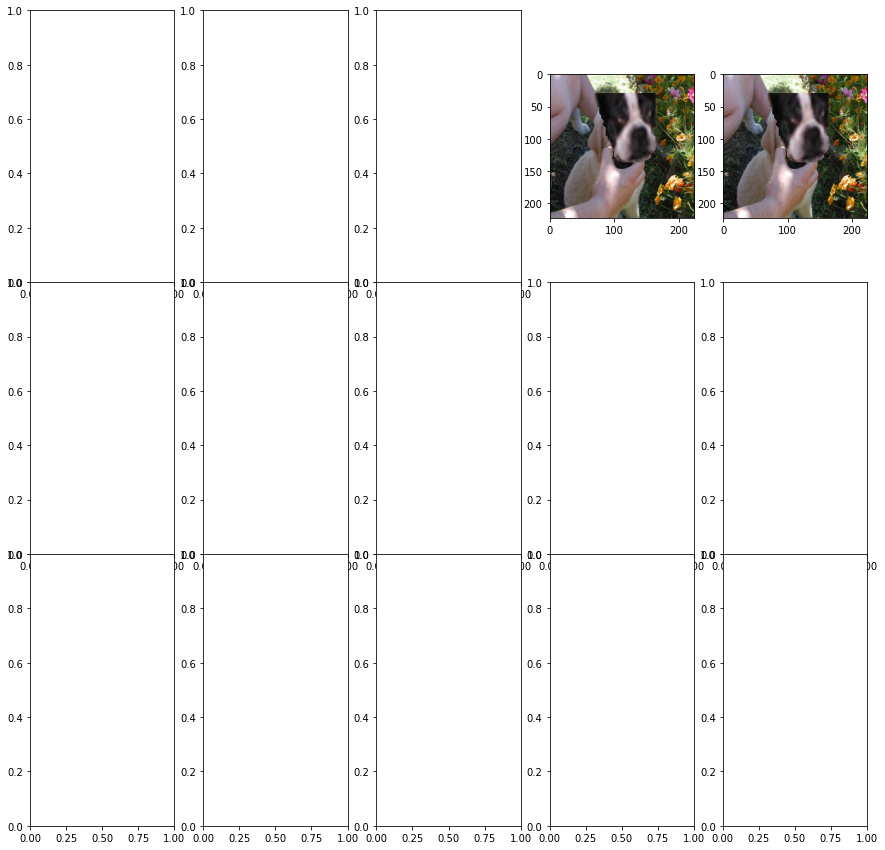

In [19]:
out = plot_func(engine, cutout_img2, vis=True)

In [13]:
#plot_func(engine, (new_images[test_idx].transpose(1,2,0)/255.+ voc_dataset.mean_bgr/255.)[:,:,::-1])
unc_dist_alea, unc_dist_epis = getUncertainyDistBlur(engine, new_images,new_parts )

100%|██████████| 1611/1611 [10:28<00:00,  2.56it/s]


In [15]:
unc_dist_alea_Cutout, unc_dist_epis_Cutout = getUncertainyDistCutOut(engine, new_images,new_parts )

100%|██████████| 1611/1611 [00:00<00:00, 14084.59it/s]


In [22]:
def getUncertainyDistCutOut2(engine,new_images,new_parts):

    cutout_ln=1
    unc_dist_alea = [[] for i in range(cutout_ln+1)]
    unc_dist_epis = [[] for i in range(cutout_ln+1)]

    for test_idx in tqdm(range(len(new_images))):
        randIdx = random.choice([i for i in range(len(new_images))])
        while(test_idx== randIdx):
            randIdx = random.choice([i for i in range(len(new_images))]) # choose index randomly
        try:
            cutout_img = partsCutout(new_images[test_idx], new_parts[test_idx],
                                     new_images[randIdx], new_parts[randIdx])
        except:
            continue
        _, aleaCutout,episCutout = plot_func(engine, cutout_img, vis=False)
        _, alea,epis = plot_func(engine, new_images[test_idx], vis=False)

        unc_dist_alea[0].append(float(alea.detach().cpu().numpy()))
        unc_dist_epis[0].append(float(epis.detach().cpu().numpy()))
        unc_dist_alea[-1].append(float(aleaCutout.detach().cpu().numpy()))
        unc_dist_epis[-1].append(float(episCutout.detach().cpu().numpy()))

    return unc_dist_alea,unc_dist_epis

unc_dist_alea_Cutout, unc_dist_epis_Cutout = getUncertainyDistCutOut2(engine, new_images,new_parts )

100%|██████████| 1611/1611 [20:51<00:00,  1.29it/s]


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cf5b29590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cf5b29c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cf5b291d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8cf5b34510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cf5b34950>,
 'means': []}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


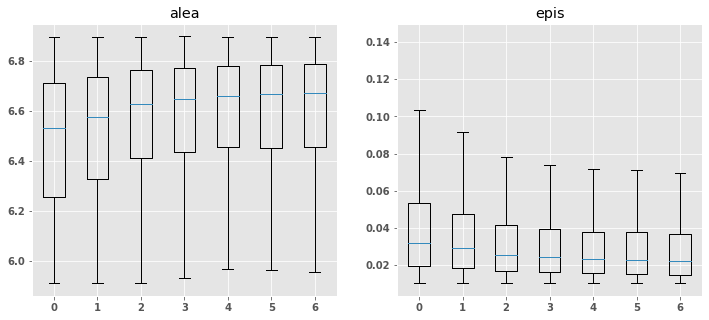

In [31]:
flierprop = {"color": "#EC407A",
"marker": "o", "markerfacecolor": "#2196F3", "markeredgecolor": "white", "markersize": 0,
"linestyle": "None",
"linewidth": 0.1}

plt.figure(figsize=(12,5))
plt.style.use("ggplot")
plt.subplot(1,2,1)
plt.title('alea')
plt.boxplot(unc_dist_alea, labels=[i for i in range(len(unc_dist_alea))],
            flierprops=flierprop)
plt.subplot(1,2,2)
plt.title('epis')
plt.boxplot(unc_dist_epis, labels=[i for i in range(len(unc_dist_epis))],
           flierprops=flierprop)


Blur 를 주면 uncertainty 값 자체가 어떻게 변하나?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f25bc5cab10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f25bc5dc3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f25bc5ca790>,
 'medians': [<matplotlib.lines.Line2D at 0x7f25bc5dcc90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f260891a110>,
 'means': []}

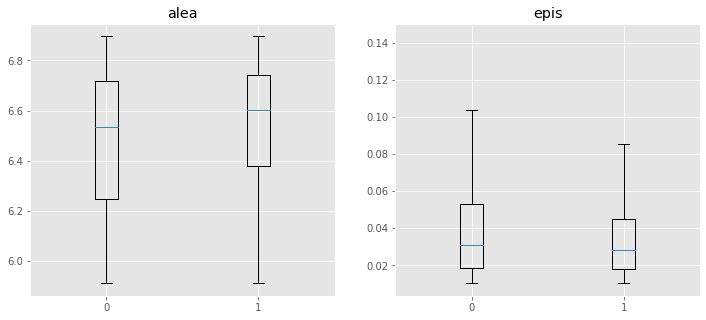

In [24]:
flierprop = {"color": "#EC407A",
"marker": "o", "markerfacecolor": "#2196F3", "markeredgecolor": "white", "markersize": 0,
"linestyle": "None",
"linewidth": 0.1}

plt.figure(figsize=(12,5))
plt.style.use("ggplot")
plt.subplot(1,2,1)
plt.title('alea')
plt.boxplot(unc_dist_alea_Cutout, labels=[i for i in range(len(unc_dist_alea_Cutout))],
            flierprops=flierprop)
plt.subplot(1,2,2)
plt.title('epis')
plt.boxplot(unc_dist_epis_Cutout, labels=[i for i in range(len(unc_dist_epis_Cutout))],
           flierprops=flierprop)

Cutout 를 주면 uncertainty 값 자체가 어떻게 변하나?

### Cutout to Head

In [11]:
mat33_cutout = calc_mat33_noise(engine, new_images, new_parts )
mat33_cutout

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using

array([[ 529.45245902,  505.26090957,  140.43780913],
       [ 432.6532346 ,  409.16855195,  253.38255035],
       [ 644.89430638,  613.57053848, 1088.17964052]])

<AxesSubplot:>

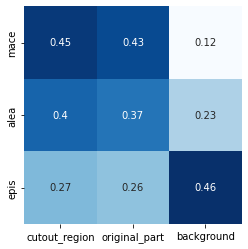

In [13]:
import seaborn as sns

for i in range(3):
    mat33_cutout[i,:] /= np.sum(mat33_cutout[i,:])

sns.heatmap(mat33_cutout, square=True, cbar=False, annot=True, cmap='Blues',\
           xticklabels=['cutout_region','original_part','background'],
           yticklabels=['mace','alea','epis'])

## Blur to Head

In [12]:
mat33_blur = calc_mat33_noise(engine, new_images, new_parts,target='blur')
mat33_blur

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using

array([[ 433.66142083,  436.26323487,  117.92470831],
       [ 511.38456937,  495.92539153,  211.85287227],
       [ 662.9540098 ,  600.8113736 , 1124.22241941]])

In [28]:
mat33_blur_dict = dict()
for sigma in np.arange(0,6.1,0.25):
    print(sigma)
    mat33_blur_tmp = calc_mat33_noise(engine, new_images, new_parts, target='blur',sigma=sigma)
    mat33_blur_dict[sigma] = mat33_blur_tmp

0.0
0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0


KeyboardInterrupt: 

<AxesSubplot:>

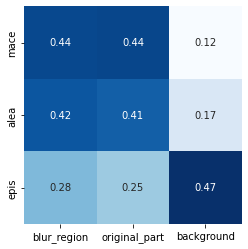

In [14]:
import seaborn as sns

for i in range(3):
    mat33_blur[i,:] /= np.sum(mat33_blur[i,:])

sns.heatmap(mat33_blur, square=True, cbar=False, annot=True, cmap='Blues',\
           xticklabels=['blur_region','original_part','background'],
           yticklabels=['mace','alea','epis'])

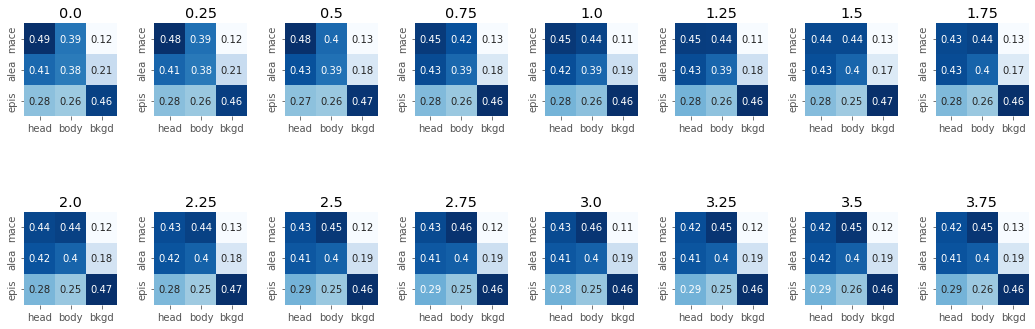

In [36]:
import seaborn as sns

plt.figure(figsize=(18,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.2)

for idx,sigma in enumerate(mat33_blur_dict.keys()):
    mat33_tmp = mat33_blur_dict[sigma]
    for i in range(3):
        mat33_tmp[i,:] /= np.sum(mat33_tmp[i,:])
    
    plt.subplot(2,len(list(mat33_blur_dict.keys()))//2, idx+1)
    plt.title(round(sigma,2))
    sns.heatmap(mat33_tmp, square=True, cbar=False, annot=True, cmap='Blues',\
               xticklabels=['head','body','bkgd'],
               yticklabels=['mace','alea','epis'])